In [1]:
%pip install numpy
%pip install tensorflow
%pip install keras
%pip install pandas
%pip install matplotlib
%pip install --upgrade pip

#imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 47.3 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 64.0 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 63.5 MB/

In [4]:
### LOAD DATA ###

train = pd.read_csv('mnist_data/mnist_train.csv')
test = pd.read_csv('mnist_data/mnist_test.csv')

# y_train = data.iloc[: 0].values --> first column is the label
# x_train = data.iloc[:, 1:].values --> remaining columns are pixel values

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

Label:  0


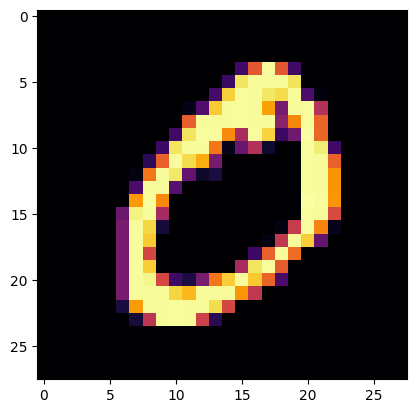

In [6]:
print("Label: ", y_train[1])
plt.imshow(x_train[1], cmap="inferno")
plt.show()

In [7]:
# PREPROCESS THE DATA
# Normalize the pixel values such that the values range from [0,1]
# (otherwise the values would be from [0, 255]

x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
### BUILDING NEURAL NETWORK ###

# creates a sequential model where layers are stacked one after another
model = Sequential()

# flattens/converts 2D input of shape (28, 28) into a 1D vector (784,)
model.add(Flatten(input_shape=(28,28)))

# (a) Dense (fully connected) layers- each neuron is connected to every
# input from the previous layer. Accomplished with matrix multiplication.
## output = (weights matrix- learned during training) * (input vector/image of the number) + (bias vector- learned during training)
# (b) Uses the ReLU (Rectified Linear Unit) activation to introduce non-linearity
## ReLU(z) = max(0,z)
# --> First layer (dense + ReLU): models non-linear features
### Looks at small combination of pixels --> learns basic patterns like edges, corners, brightness blobs
model.add(Dense(128, activation='relu'))

# Using ReLU after each hidden layer allows the network to learn non-linear patterns at each stage.
# Each layer transforms the data and builds new features from previous ones.
### Moves from concrete --> abstract (e.i. dots->lines->shapes->concepts)
# --> Second layer (dense + ReLU): models non-linear combinations of the first layer's non-linear features
# Ultimately, dense + ReLU + dense + ReLU allows you to stack curves on curves, resulting in complex, flexible decision boundary.
# This allows the data to be separated in complex ways (curves, spirals, clusters)- not just a straight line
### Takes the basic patterns and combines them into shapes/structures (e.g. loop, hook shape, etc.)
model.add(Dense(32, activation='relu'))

# Dense(10) is a fully connected layer with 10 output neurons. 
# Each neuron represents one class that the model is trying to predict
# In this case, the 10 classes are the digits 0-9
# Softmax turns the raw output values (logits) into a probability distribution
## softmax(raw score for class i (logit)) = (e^(logit)) / (sum of all the exponentials of all logits (ensuring everything adds up to 1))
# The class with the highest probability is the model's final prediction (argmax)
### REMARK
# Softmax is compatible with categorical_crossentropy loss (used for multi-class classification)
# Categorical_crossentropy measures how well the probabilites match the truth
## loss = -(sum of ((actual label)log(predicted probability of softmax)) for all logits)
model.add(Dense(10, activation='softmax'))

model.summary()

### REMARK ###
# While intuitively, it may seem that more layers = more power = more accuracy
# However, more layers can also be harmful
# (1) overfitting
# too many layers = too many params = model starts memorizing the training data instead of learning patterns
# This would be great for training accuracy but terrible for test accuracy
# (2) vanishing gradients
# In deeper networks, gradients can become tiny as they backpropagate -> the earlier layers don't learn well
# ReLU helps with this, but not 100%
# (3) more complexity
# Sometimes adding more layers adds complexity for no reason.
# As a result, deeper models take longer to train and are prone to instability if not managed carefully

/Users/colleenl/CSProjects/MLProjects/forgery-detection/venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9170 - loss: 0.2897 - val_accuracy: 0.9548 - val_loss: 0.1536
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9649 - loss: 0.1174 - val_accuracy: 0.9657 - val_loss: 0.1119
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0808 - val_accuracy: 0.9678 - val_loss: 0.1103
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0599 - val_accuracy: 0.9683 - val_loss: 0.1069
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9725 - val_loss: 0.1059
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.9686 - val_loss: 0.1201
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0292 - val_accuracy: 0.9697 - val_loss: 0.1152
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0256 - 

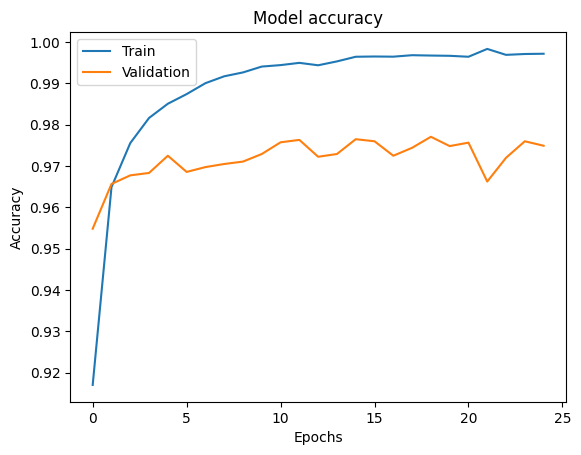

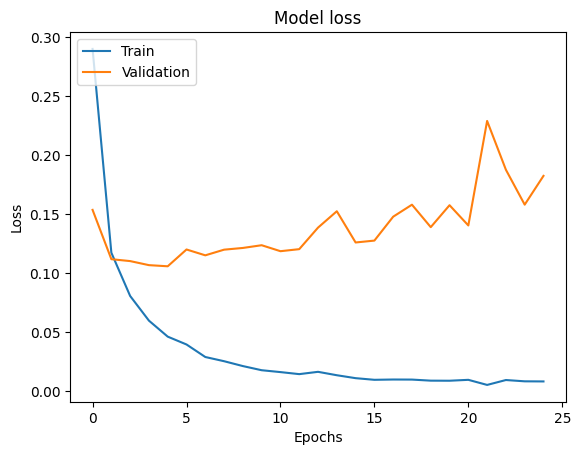

In [9]:
### COMPILING AND TRAINING THE MODEL ###

# This compiles the model and prepares it for training
# We compile the model by telling it what to optimize (loss), how to optimize (optimizer), and what to track (accuracy)
# (1) loss = 'sparse_categorical_crossentropy'
# This is the loss function for how the model measures its errors
# sparse_categorical_crossentropy is used for multi-class classification when the labels are integers (not one-hot encoded)
# (2) optimizer='Adam'
# Optimizer is the algorithm used to minimize the loss function and update the model's weights
# Adam (Adaptive Moment Estimation) is a popular optimizer.
# It adjusts the learning rate dynamically for each parameter, which helps with faster and more stable convergence.
# (3) metrics=['accuracy']
# Metrics are used to evaluate the model during training and testing
# Accuracy as the metric = the percentage of correct predictions (correct class predicted vs actual class)
# This tracks the accurage on both the training and validation data
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# This trains the model on the data
# We train the model over 25 rounds, using 80% of the data for training and 20% for validation.
# This allows the model to learn meaningful patterns and gives real-time feedback on its progress.
# (1) epochs=25
# This number of epochs is how many times the model will see the entire training dataset
# The model will iterate over the training data 25 times.
### REMARK ###
# More epochs can help the model learn better, but too many can lead to overfitting
# (2) validation_split=0.2
# This means that 20% of the training data is used for validation.
# The remaining 80% is used to train the model
# This allows us to track overfitting.
# If the model gets too good at training data but performs poorly on validation, it is overfitting
# RETURN VALUE: history stores the training and validation metrics (like accuracy and loss) during the entire training process
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
### EVALUATE THE MODEL ON TEST DATA ###

# This calculates the loss and accuracy on the test data
# Loss measures how well the model's predictions match the true labels 
# (lower loss = better performance)
# Accuracy shows the percentage of correctly classified samples out of all test samples
# = This allows us to understand the real-world performance of the model (can help us determine overfitting/memorizing training data, etc.)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.9772 - loss: 0.1426
Test loss: 0.1425502747297287
Test accuracy: 0.9771999716758728


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 65.4 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


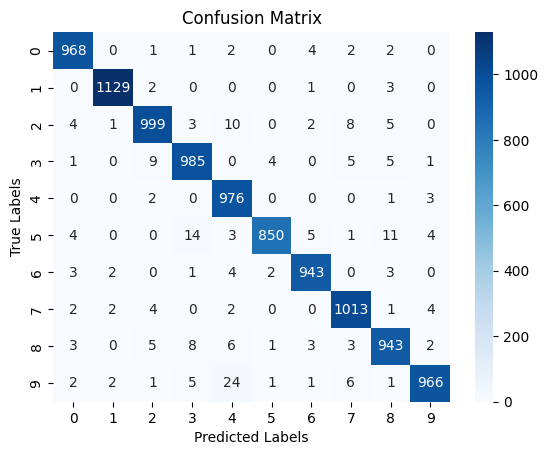

In [12]:
### MAKE PREDICTIONS ###

# We predict the labels for new/unseen data. This tests how well the model performs on data outside of training and validation sets

# This generates probabilities for each class for every sample in the test set.
# The shape of predictions will be (num_samples, num_classes)
# num_samples is the number of test samples; num_classes is the number of possible categories (10 digits in MNIST)
predictions = model.predict(x_test)

# This converts the probabilities into the predicted label (the class with the highest probability for each sample)
predicted_labels = predictions.argmax(axis=1)

# CONFUSION MATRIX
# This computes the confusion matrix, returning a square matrix of size 10x10 for MNIST
# where each row represents the true class and each column represents the predicted class
# => The diagonal elements of the matrix represent correct classifications, and the off-diagonal elements represent misclassifications
# We will use a heatmap (sns.heatmap()) to visualize the confusion matrix: darker colors indicating higher values

# %pip install scikit-learn
# %pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
# Confusion matrix allows us to understand if the model is making specific types of errors (e.g. certain digits)
# This information can guide model improvement (e.g. training adjustments)

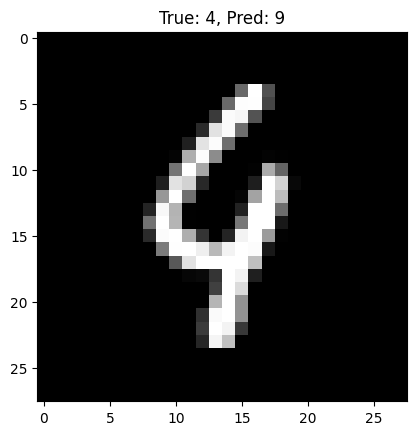

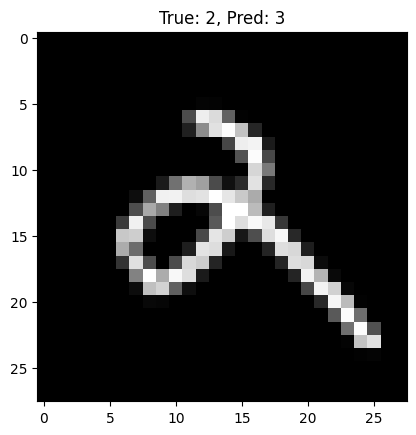

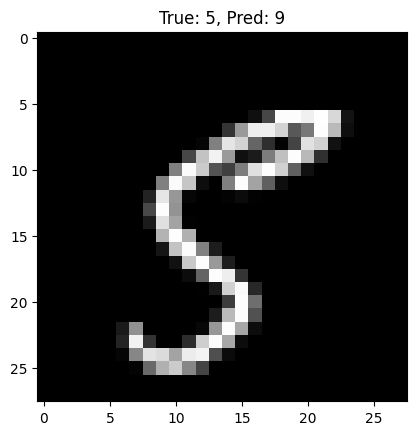

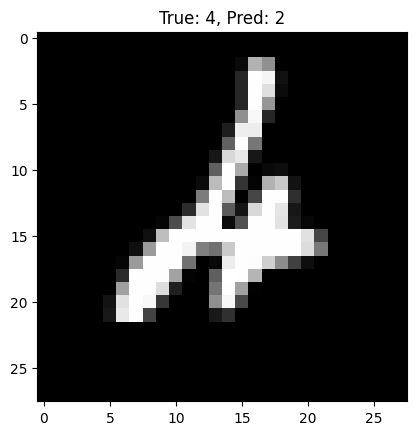

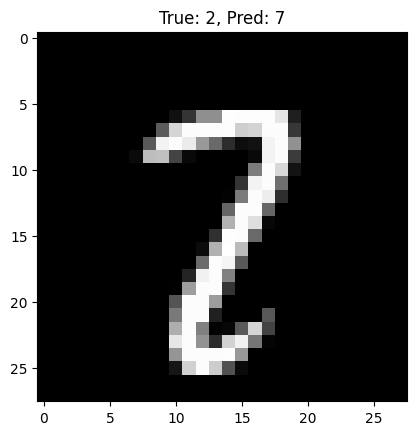

In [13]:
### INSPECTING MODEL MISCALCULATIONS ###
# This finds the indices of all misclassified samples by comparing predicted_labels with y_test

misclassified_indices = [i for i in range(len(y_test)) if predicted_labels[i] != y_test[i]]
sample_misclassified = misclassified_indices[:5]  # Just display 5 misclassified examples

for i in sample_misclassified:
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {predicted_labels[i]}')
    plt.show()

Input shape for prediction: (1, 28, 28)


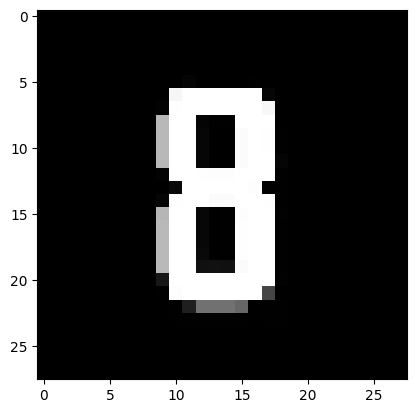

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Label: 0


In [16]:
### TESTING WITH CUSTOM IMAGE ###

from tensorflow.keras.preprocessing import image

img = image.load_img('mnist_data/testing_8.png', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = img_array.reshape(1, 28, 28)
print("Input shape for prediction:", img_array.shape)
plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.show()

prediction = model.predict(img_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Predicted Label: {predicted_label[0]}')